In [933]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"cleaned_student_depression_dataset.csv",index_col= 0,header = 0 )

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27857 entries, 0 to 27901
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27857 non-null  int64  
 1   Gender                                 27857 non-null  object 
 2   Age                                    27857 non-null  int64  
 3   City                                   27857 non-null  object 
 4   Profession                             27857 non-null  object 
 5   Academic Pressure                      27857 non-null  int64  
 6   Work Pressure                          27857 non-null  int64  
 7   CGPA                                   27857 non-null  float64
 8   Study Satisfaction                     27857 non-null  int64  
 9   Job Satisfaction                       27857 non-null  int64  
 10  Sleep Duration                         27857 non-null  object 
 11  Dietary

In [935]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Serial Number,,,,,,,,,,,,,,,,,,
0,1,Male,19,Delhi,Student,4,0,6.00,3,0,'6-7 hours',Moderate,B.com,Yes,8,4,No,True
1,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,True
2,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,False
3,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,False
4,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,True


In [936]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000
mean,70443.316725,25.820835,3.141580,0.000431,7.655911,2.944395,0.000682,7.157196,3.140467
std,40648.631003,4.906158,1.381802,0.044027,1.470837,1.360876,0.044429,3.707066,1.437145
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.280000,2.000000,0.000000,4.000000,2.000000
50%,70694.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,105827.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


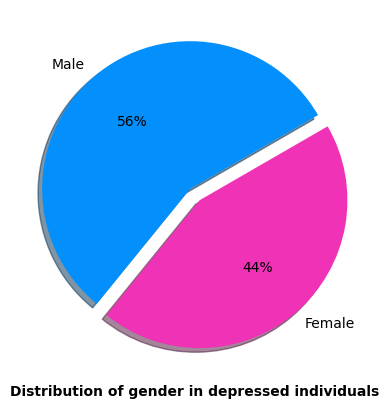

In [937]:
explode = (0.05, 0.05)
# df[df['Depression'] == True]['Gender'].value_counts().plot( 
#     kind='pie', ylabel='Distribution of gender in depressed individuals', autopct='%1.0f%%', 
#   colors=colors, explode=explode, shadow=True, startangle = 20)
plt.pie(df[df['Depression'] == True]['Gender'].value_counts(), labels=['Male','Female'],
                autopct='%1.0f%%', colors=['#0390fc', '#f032b7'], explode=explode, 
                shadow=True, startangle = 30)
plt.xlabel('Distribution of gender in depressed individuals',
             fontsize=10, color='black', fontweight='bold')
plt.show()

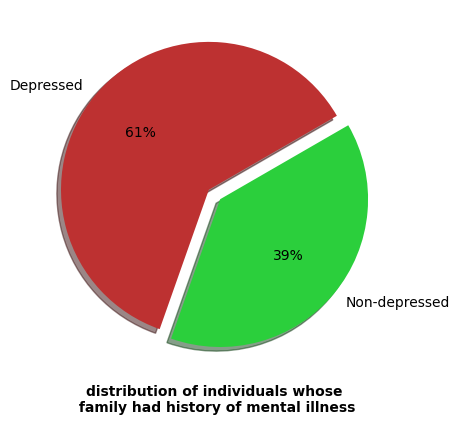

In [938]:
plt.pie(df[df['Family History of Mental Illness'] == 'Yes']['Depression'].value_counts(),
        labels=['Depressed','Non-depressed'], autopct='%1.0f%%', colors= ['#bd3131','#2bcf3c'],
        explode=explode, shadow=True, startangle = 30)
plt.xlabel('distribution of individuals whose\n family had history of mental illness',
             fontsize=10, color='black', fontweight='bold')
plt.show()

In [939]:
df[df['Depression'] == True]['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    5357
'7-8 hours'            4367
'5-6 hours'            3512
'More than 8 hours'    3076
'6-7 hours'               1
Name: count, dtype: int64

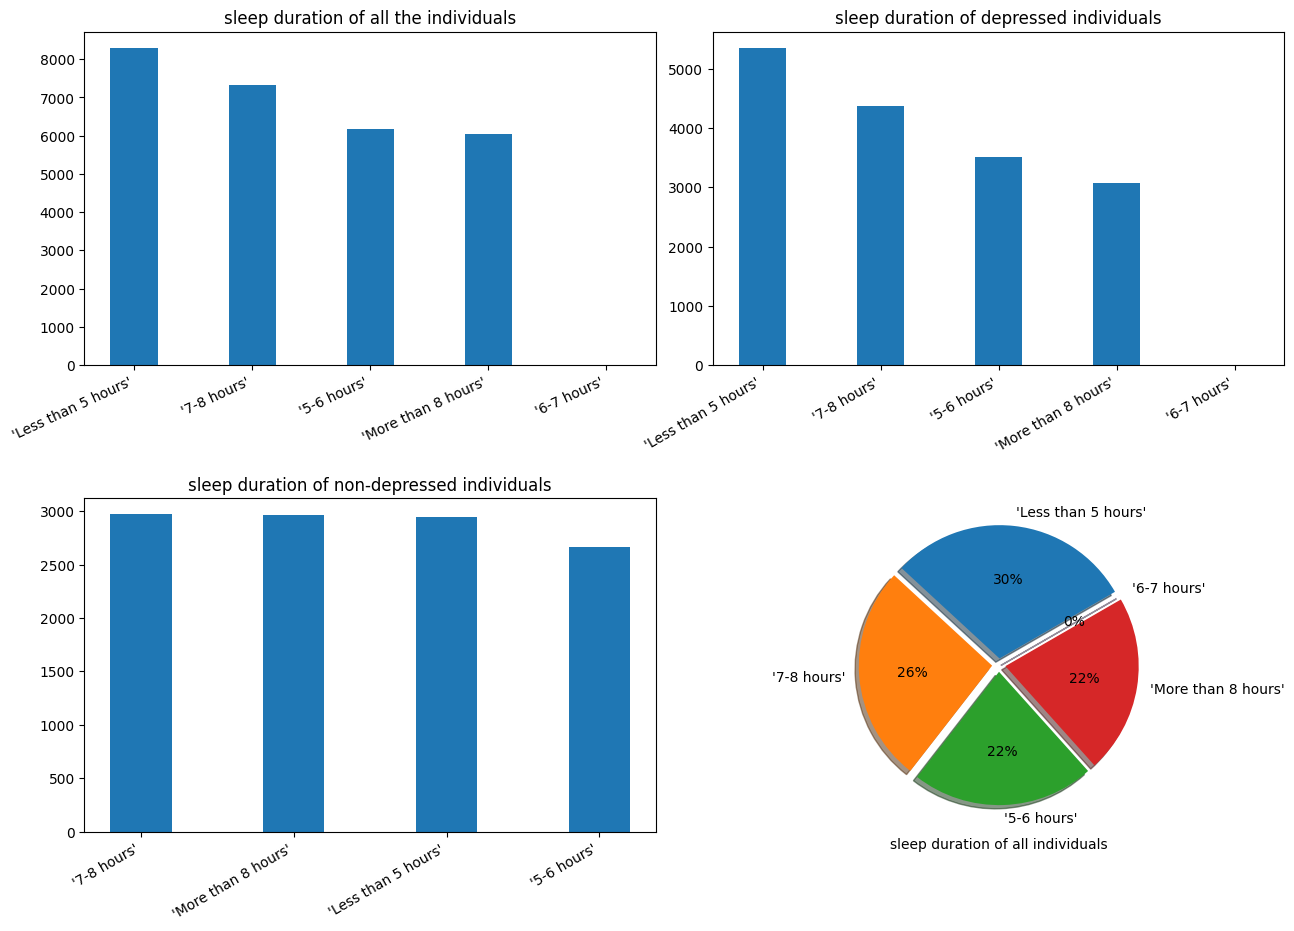

In [940]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
labels1 = df['Sleep Duration'].value_counts().index
axes[0,0].bar(labels1, df['Sleep Duration'].value_counts(), width=0.4)
axes[0,0].set_xticks(labels1, labels1, rotation=25, ha='right')
axes[0,0].tick_params(axis='x', labelsize=10)
axes[0,0].set_title('sleep duration of all the individuals')

labels2 = df[df['Depression'] == True]['Sleep Duration'].value_counts().index
axes[0,1].bar(labels2, df[df['Depression'] == True]['Sleep Duration'].value_counts(), width=0.4)
axes[0,1].set_xticks(labels2, labels2, rotation=30, ha='right')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].set_title('sleep duration of depressed individuals')

labels3 = df[df['Depression'] == False]['Sleep Duration'].value_counts().index
axes[1,0].bar(labels3, df[df['Depression'] == False]['Sleep Duration'].value_counts(), width=0.4)
axes[1,0].set_xticks(labels3, labels3, rotation=30, ha='right')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].set_title('sleep duration of non-depressed individuals')

explode = (0.05,0.05,0.05,0.05,0.05)
axes[1,1].pie(df['Sleep Duration'].value_counts(), autopct='%1.0f%%', shadow=True, startangle = 30, labels = labels1, 
              explode = explode )
axes[1,1].set_xlabel('sleep duration of all individuals')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)

plt.show()

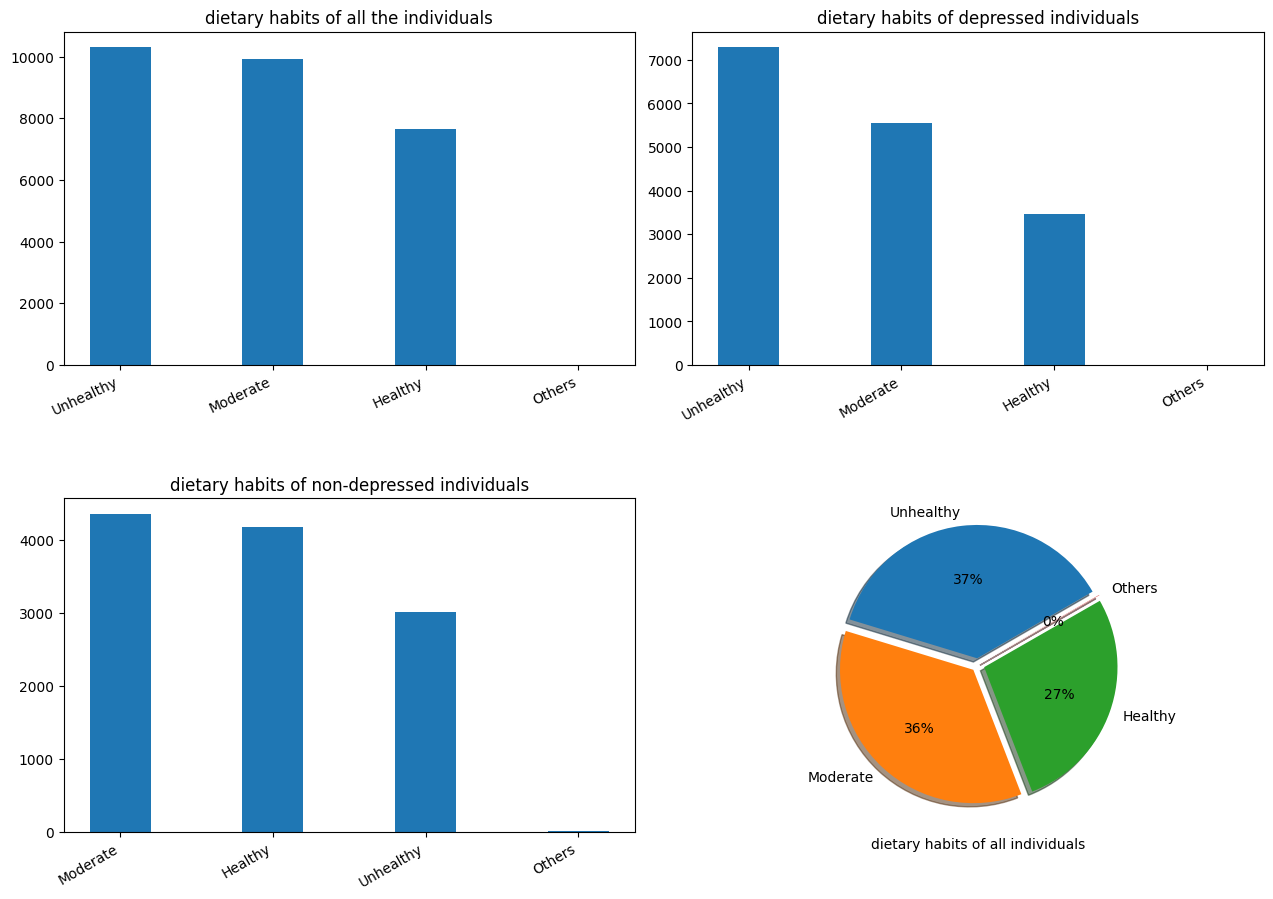

In [941]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
labels1 = df['Dietary Habits'].value_counts().index
axes[0,0].bar(labels1, df['Dietary Habits'].value_counts(), width=0.4)
axes[0,0].set_xticks(labels1, labels1, rotation=25, ha='right')
axes[0,0].tick_params(axis='x', labelsize=10)
axes[0,0].set_title('dietary habits of all the individuals')

labels2 = df[df['Depression'] == True]['Dietary Habits'].value_counts().index
axes[0,1].bar(labels2, df[df['Depression'] == True]['Dietary Habits'].value_counts(), width=0.4)
axes[0,1].set_xticks(labels2, labels2, rotation=30, ha='right')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].set_title('dietary habits of depressed individuals')

labels3 = df[df['Depression'] == False]['Dietary Habits'].value_counts().index
axes[1,0].bar(labels3, df[df['Depression'] == False]['Dietary Habits'].value_counts(), width=0.4)
axes[1,0].set_xticks(labels3, labels3, rotation=30, ha='right')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].set_title('dietary habits of non-depressed individuals')

explode = (0.05,0.05,0.05,0.05)
axes[1,1].pie(df['Dietary Habits'].value_counts(), autopct='%1.0f%%', shadow=True, startangle = 30, labels = labels1,
              explode = explode)
axes[1,1].set_xlabel('dietary habits of all individuals')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)

plt.show()

In [942]:
'''use only if integer value of sleep hours is needed'''
# def sleep_fix(x: str):
#     encounters = []
#     temp = ""
#     for y in range(len(x)):
#         if x[y].isdigit():
#             if len(temp) > 0:
#                 temp = temp + x[y]
#                 encounters.append(str(temp))
#             else:
#                 temp = x[y]
            
#         else :
#             if len(temp) > 0 :
#                 encounters.append(str(temp))
#             temp = ""
#     if len(encounters) > 0 :
#         return max(encounters)
#     else:
#         return ""

# def sleep_to_int(x:str):
#     if x == 'Less than 5 hours':
#         return 5
#     elif x == '7-8 hours':
#         return 8
#     elif x == '5-6 hours':
#         return 6
#     elif x == 'More than 8 hours':
#         return 8
#     elif x == '6-7 hours':
#         return 7
# df['Sleep Duration'] = df['Sleep Duration'].apply(sleep_fix)

'use only if integer value of sleep hours is needed'